## Imports/Setup

In [33]:
%run ../00_functions/00_custom_functions.ipynb
standard_setup(extra_packages=True, verbose=False)
data_ingestion_prep(start_yearmonth='1979-01', end_yearmonth='2022-12', verbose=False)

env: ESMFMKFILE=/home/ds4114/.conda/envs/leap_test202308-3/lib/esmf.mk
Files will be outputed as: .nc
ECMWF CDS API key already installed


## Collection: Temperature (SST)

#### NOAA

In [ ]:
#NOAA SST is easy because NOAA uses the same URL for all data across time periods (1981-09 to present only)
#More info found on https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html
sst_direct_url = 'https://downloads.psl.noaa.gov/Datasets/noaa.oisst.v2.highres/sst.mon.mean.nc' 
sst_destination_folder = global_vars['download_folder']+r'SST/originals/'
sst_destination_filename = 'SST_NOAA_OI-V2-HighRes_198109-'+today_yearmonth+'.nc'  #data is only from 1981
download(sst_direct_url, sst_destination_folder, sst_destination_filename)

#### ECMWF

In [15]:
#This SST dataset comes from European Centre for Medium-Range Weather Forecasts (1940-01 to present only). It is the same as the one used for SLP below.
#More info can be found on https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=form
#We installed the API and have an account, so now we can download the ERA5 data via a loop (yearly)
#While this data can be downloaded together with SLP, we have chosen to break up the downloads for clarity and organization
sst_destination_folder = global_vars['download_folder']+r'SST/originals/'
for year in range(acquisition_start_year, acquisition_end_year+1, 1):
    sst_destination_filename = ''
    months = []
    if year == datetime.datetime.now().year:   #if a partial year; this prevents erorrs trying to use the API to get future/non-existant data    
        months = [i for i in range(1,datetime.datetime.now().month -1)]  
        sst_destination_filename = 'SST_ECMWF_ERA5-monthly-reanalysis-SST_'+str(year)+'.nc'  
        #Note, partial years will not automatically be overwritten so you must manually clean up unneeded files
    else:
        sst_destination_filename = 'SST_ECMWF_ERA5-monthly-reanalysis-SST_'+str(year)+'.nc'
        months = [i for i in range(1,12+1)]

    cdsapi_custom_download(year, months, 'sea_surface_temperature', sst_destination_folder, sst_destination_filename, overwrite=False, create_dest=False)
    
print("ERA5 SST Complete")

File SST_ECMWF_ERA5-monthly-reanalysis-SST_1979.nc already exists - (skipping download from 1979 )
File SST_ECMWF_ERA5-monthly-reanalysis-SST_1980.nc already exists - (skipping download from 1980 )
File SST_ECMWF_ERA5-monthly-reanalysis-SST_1981.nc already exists - (skipping download from 1981 )
File SST_ECMWF_ERA5-monthly-reanalysis-SST_1982.nc already exists - (skipping download from 1982 )
File SST_ECMWF_ERA5-monthly-reanalysis-SST_1983.nc already exists - (skipping download from 1983 )
File SST_ECMWF_ERA5-monthly-reanalysis-SST_1984.nc already exists - (skipping download from 1984 )
File SST_ECMWF_ERA5-monthly-reanalysis-SST_1985.nc already exists - (skipping download from 1985 )
File SST_ECMWF_ERA5-monthly-reanalysis-SST_1986.nc already exists - (skipping download from 1986 )
File SST_ECMWF_ERA5-monthly-reanalysis-SST_1987.nc already exists - (skipping download from 1987 )
File SST_ECMWF_ERA5-monthly-reanalysis-SST_1988.nc already exists - (skipping download from 1988 )
File SST_E

2023-08-28 14:05:43,444 INFO Welcome to the CDS
2023-08-28 14:05:43,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2023-08-28 14:05:43,772 INFO Request is completed
2023-08-28 14:05:43,774 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data7/adaptor.mars.internal-1693231843.3536522-7842-17-244bef39-e605-4dd6-ab69-958c74f39fae.nc to ../tmp/SST_ECMWF_ERA5-monthly-reanalysis-SST_2023.nc (11.9M)
2023-08-28 14:05:53,632 INFO Download rate 1.2M/s   


Transferring to Destination /data/artemis/workspace/ds4114/online_data/SST/originals/SST_ECMWF_ERA5-monthly-reanalysis-SST_2023.nc...
ERA5 SST Complete


#### JRA55

In [12]:
#This SST data source comes from Japan Meteorological Agency (JMA) (195801 - to 2023 only)
#JRA55-do (Tsujino et al., 2018)  corrects the atmospheric reanalysis product JRA-55 (Kobayashi et al., 2015) 
#More info can be found on https://climate.mri-jma.go.jp/pub/ocean/JRA55-do/

sst_destination_folder = global_vars['download_folder']+r'SST/originals/'
for year in range(acquisition_start_year, acquisition_end_year+1, 1):
    sst_jra55_destination_filename = 'SST_JMA_JRA55-do-daily-reanalysis-SST_'+str(year)+'.nc'
    direct_link = None
    
    #downloading via direct links. Recent data (2020+) is hosted on a different site
    if year == 2020:
        direct_link = 'https://climate.mri-jma.go.jp/pub/ocean/JRA55-do/ocean/day/tos/gn/v20210315/tos_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0-1_gn_20200101-20201231.nc'
    elif year == 2021:
        direct_link = 'https://climate.mri-jma.go.jp/pub/ocean/JRA55-do/ocean/day/tos/gn/latest/tos_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0-1_gn_20210101-20211231.nc'
    elif year == 2022:
        direct_link = 'https://climate.mri-jma.go.jp/pub/ocean/JRA55-do/ocean/day/tos/gn/latest/tos_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0-1_gn_20220101-20221231.nc'
    elif year == 2023:
        direct_link = 'https://climate.mri-jma.go.jp/pub/ocean/JRA55-do/ocean/day/tos/gn/latest/tos_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0-1_gn_20230101-20230824.nc'
            #previously: #direct_link = 'https://climate.mri-jma.go.jp/pub/ocean/JRA55-do/ocean/day/tos/gn/latest/tos_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0-1_gn_20230101-20230629.nc'
        sst_jra55_destination_filename = 'SST_JMA_JRA55-do-daily-reanalysis-SST_'+str(year)+'.nc' #rename if desired since only part of the year available
    else:
        base = 'https://esgf-data2.llnl.gov/thredds/fileServer/user_pub_work/input4MIPs/CMIP6/OMIP/MRI/MRI-JRA55-do-1-5-0/ocean/day/tos/gn/v20200916/tos_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0_gn_'
        end = str(year)+'0101-'+str(year)+'1231.nc'
        direct_link = base + end  #ex: #https://esgf-data2.llnl.gov/thredds/fileServer/user_pub_work/input4MIPs/CMIP6/OMIP/MRI/MRI-JRA55-do-1-5-0/ocean/day/tos/gn/v20200916/tos_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0_gn_19580101-19581231.nc
    
    download(direct_link, sst_destination_folder, sst_jra55_destination_filename)
print("JRA55 SST Complete")

File SST_JMA_JRA55-do-daily-reanalysis-SST_1979.zarr already exists at gs://leap-persistent/ds4114/online_data/SST/originals/ - (skipping download from https://esgf-data2.llnl.gov/thredds/fileServer/user_pub_work/input4MIPs/CMIP6/OMIP/MRI/MRI-JRA55-do-1-5-0/ocean/day/tos/gn/v20200916/tos_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0_gn_19790101-19791231.nc )
File SST_JMA_JRA55-do-daily-reanalysis-SST_1980.zarr already exists at gs://leap-persistent/ds4114/online_data/SST/originals/ - (skipping download from https://esgf-data2.llnl.gov/thredds/fileServer/user_pub_work/input4MIPs/CMIP6/OMIP/MRI/MRI-JRA55-do-1-5-0/ocean/day/tos/gn/v20200916/tos_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0_gn_19800101-19801231.nc )
File SST_JMA_JRA55-do-daily-reanalysis-SST_1981.zarr already exists at gs://leap-persistent/ds4114/online_data/SST/originals/ - (skipping download from https://esgf-data2.llnl.gov/thredds/fileServer/user_pub_work/input4MIPs/CMIP6/OMIP/MRI/MRI-JRA55-do-1-5-0/ocean/da

## Processing: Temperature (SST)

#### NOAA

In [10]:
sst = xr_open_dataset_custom(data_folder_root+r'SST/originals/SST_NOAA_OI-V2-HighRes_198109-202308.nc')  
        #previously SST_NOAA_OI-V2-HighRes_198109-202306.nc
#sst

Encountered an error - trying with gs://leap-persistent/ds4114/online_data/SST/originals/SST_NOAA_OI-V2-HighRes_198109-202308.zarr...
Success.


In [11]:
%%time
sst_filtered = sst.sel(time=slice(str(processed_start_yearmonth),str(processed_end_yearmonth))) #already monthly so select desired years
sst_regridder = xesmf.Regridder(sst_filtered, ideal_grid, 'conservative', periodic=True)  #see notes above on why conservative over bilinear
sst_out = sst_regridder(sst_filtered.chunk(-1) , keep_attrs=True)
#sst_out

CPU times: user 28.8 s, sys: 993 ms, total: 29.8 s
Wall time: 29.8 s


In [12]:
sst_out = sst_out.rename({'latitude': 'ylat','longitude': 'xlon'}) #rename to be consistent with prior work
sst_out = sst_out.assign_coords(time=ttime) #overwrite time dimension to be midmonth

In [13]:
output_xarray_with_date(sst_out, data_folder_root+'SST/processed/', 'SST_NOAA_OI-V2-1x1', output_file_type)

Cancelling output - SST_NOAA_OI-V2-1x1_198201-202304.zarr already exists in gs://leap-persistent/ds4114/online_data/SST/processed/


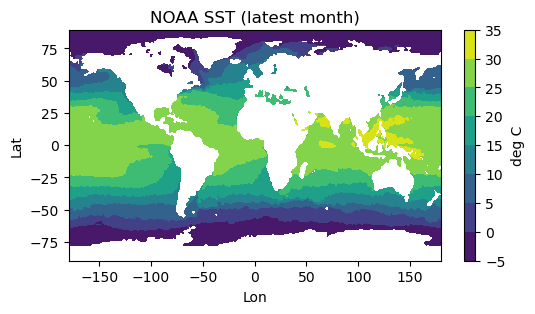

In [14]:
fig = plt.figure(figsize=(figsizew,figsizeh))
plt.contourf(ideal_grid.longitude,ideal_grid.latitude,sst_out.sst.sel(time='2022-06-15')) #just choosing latest time slice
plt.title('NOAA SST (latest month)'); plt.xlabel('Lon'); plt.ylabel('Lat')
plt.colorbar().set_label('deg C');

#### ECMWF

In [15]:
#sst_era5 = xr.open_mfdataset(data_folder_root+r'SST/originals/SST_ECMWF_ERA5-monthly-reanalysis-SST_*.nc') 
sst_era5 = xr_open_mfdataset_custom(data_folder_root+r'SST/originals/SST_ECMWF_ERA5-monthly-reanalysis-SST_*.nc') 

Encountered an error - trying with gs://leap-persistent/ds4114/online_data/SST/originals/SST_ECMWF_ERA5-monthly-reanalysis-SST_*.zarr
Success.


In [18]:
%%time
#Regrid sst_era5
sst_era5_highres = sst_era5 #previously required sst_era5.sel(expver=1) to remove the experimental/recent data but dimension is not included now
sst_era5_highres = sst_era5_highres.sst - 273.15  #Also convert deg K to deg C.
    #Note the expver variable in era5 indicates new experimental data: #https://confluence.ecmwf.int/pages/viewpage.action?pageId=173385064
sst_era5_highres = sst_era5_highres.sel(time=slice(str(processed_start_yearmonth),str(processed_end_yearmonth))) #already monthly so select desired years
sst_era5_highres = xr.Dataset({'sst_era5':(['time','latitude','longitude'],sst_era5_highres.data),'time':(['time'],sst_era5_highres.time.data),'latitude':(['latitude'],sst_era5_highres.latitude.data),'longitude':(['longitude'],sst_era5_highres.longitude.data)})
sst_era5_highres_regridder = xesmf.Regridder(sst_era5_highres, ideal_grid, 'bilinear', periodic=True) #See note above about bilinear vs conservative
sst_era5_out = sst_era5_highres_regridder(sst_era5_highres.chunk(-1), keep_attrs=False)
#sst_era5_out

CPU times: user 13.6 s, sys: 75.7 ms, total: 13.7 s
Wall time: 13.7 s


In [19]:
sst_era5_out = sst_era5_out.rename({'latitude': 'ylat','longitude': 'xlon'}) #rename to be consistent with prior work
sst_era5_out = sst_era5_out.assign_coords(time=ttime) #overwrite time dimension to be midmonth
sst_era5_out.sst_era5.attrs['units'] = 'deg C'

In [21]:
output_xarray_with_date(sst_era5_out, data_folder_root+'SST/processed/', 'SST_ECMWF_ERA5-monthly-reanalysis-1x1-SST', output_file_type)

Saved SST_ECMWF_ERA5-monthly-reanalysis-1x1-SST_198201-202304.zarr to gs://leap-persistent/ds4114/online_data/SST/processed/


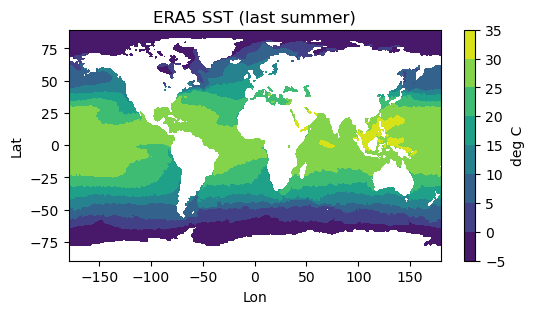

In [20]:
fig = plt.figure(figsize=(figsizew,figsizeh))
plt.contourf(ideal_grid.longitude,ideal_grid.latitude,sst_era5_out.sst_era5.sel(time='2022-06-15').data) #just choosing one time slice
plt.title('ERA5 SST (last summer)'); plt.xlabel('Lon'); plt.ylabel('Lat')
plt.colorbar().set_label('deg C');

#### JRA55

In [22]:
sst_jra55 = xr_open_mfdataset_custom(data_folder_root+r'SST/originals/SST_JMA_JRA55-do-daily-reanalysis-SST_*.nc')
#There is a lot of metadata in these files

Encountered an error - trying with gs://leap-persistent/ds4114/online_data/SST/originals/SST_JMA_JRA55-do-daily-reanalysis-SST_*.zarr
Success.


In [33]:
#Data is on a dialy basis so we need to average to get a monthly SST
sst_jra55_monthly = sst_jra55.tos.resample({'time':'1m'}).mean()
    #np.array(test.sel(time='2018-01-31',lat=0.5,lon=.5)) #28.461128

#Next, regrid
sst_jra55_monthly = sst_jra55_monthly.sel(time=slice(str(processed_start_yearmonth),str(processed_end_yearmonth))) #to select desired years
sst_jra55_monthly = sst_jra55_monthly.to_dataset(name='sst_jra55')
sst_jra55_monthly_regridder = xesmf.Regridder(sst_jra55_monthly, ideal_grid, 'bilinear', periodic=True) #See note above about bilinear vs conservative
sst_jra55_out = sst_jra55_monthly_regridder(sst_jra55_monthly.chunk(-1), keep_attrs=False)
#sst_jra55_out

<xarray.Dataset>
Dimensions:    (time: 496, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2023-04-30
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    sst_jra55  (time, latitude, longitude) float32 dask.array<chunksize=(496, 180, 360), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [34]:
sst_jra55_out = sst_jra55_out.rename({'latitude': 'ylat','longitude': 'xlon'}) #rename to be consistent with prior work
sst_jra55_out = sst_jra55_out.transpose('time','ylat','xlon')
sst_jra55_out = sst_jra55_out.assign_coords(time=ttime) #overwrite time dimension to be midmonth
sst_jra55_out.attrs['units'] = 'deg C'

In [36]:
output_xarray_with_date(sst_jra55_out, data_folder_root+'SST/processed/', 'SST_JMA_JRA55-do-monthly-reanalysis-SST', output_file_type)

Saved SST_JMA_JRA55-do-monthly-reanalysis-SST_198201-202304.zarr to gs://leap-persistent/ds4114/online_data/SST/processed/


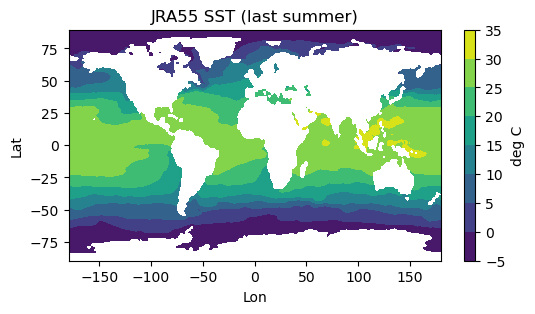

In [35]:
fig = plt.figure(figsize=(figsizew,figsizeh))
plt.contourf(ideal_grid.longitude,ideal_grid.latitude,sst_jra55_out.sst_jra55.sel(time='2022-06-15').data) #just choosing one time slice
plt.title('JRA55 SST (last summer)'); plt.xlabel('Lon'); plt.ylabel('Lat')
plt.colorbar().set_label('deg C');